In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model, save_model

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/sign_mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/sign_mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
train['label'].nunique()

24

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

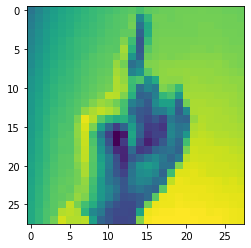

In [ ]:
plt.imshow(train.iloc[0][1:].values.reshape(28,28))

In [ ]:
train.iloc[:,0:1]

,label
0,3
1,6
2,2
3,2
4,13
...,...
27450,13
27451,23
27452,18
27453,17


In [ ]:
X_train = train.iloc[:,1:]/255
y_train = train.iloc[:,0:1]
y_test = test.iloc[:,0:1]
X_test = test.iloc[:,1:]/255

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27455, 784)
(27455, 1)
(7172, 784)
(7172, 1)


In [ ]:
y_train.iloc[30]

label    1
Name: 30, dtype: int64

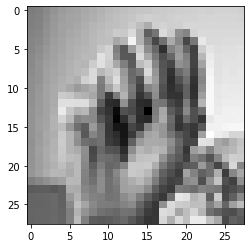

In [ ]:
plt.imshow(X_train.iloc[30].values.reshape(28,28),cmap='gray')

In [ ]:
X_train = X_train.values.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.values.reshape(X_test.shape[0], *(28, 28, 1))
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [ ]:
X_train

array([[[[0.41960784],
         [0.4627451 ],
         [0.49803922],
         ...,
         [0.66666667],
         [0.66666667],
         [0.6627451 ]],

        [[0.43529412],
         [0.4745098 ],
         [0.50588235],
         ...,
         [0.67058824],
         [0.67058824],
         [0.66666667]],

        [[0.44313725],
         [0.48235294],
         [0.51372549],
         ...,
         [0.67058824],
         [0.67058824],
         [0.67058824]],

        ...,

        [[0.55686275],
         [0.58823529],
         [0.62352941],
         ...,
         [0.79215686],
         [0.78823529],
         [0.78431373]],

        [[0.55686275],
         [0.59215686],
         [0.62745098],
         ...,
         [0.8       ],
         [0.79607843],
         [0.79215686]],

        [[0.55686275],
         [0.59215686],
         [0.62745098],
         ...,
         [0.8       ],
         [0.79607843],
         [0.79215686]]],


       [[[0.60784314],
         [0.61568627],
         [0.61

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 25, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

In [ ]:
callbacks = [
    ModelCheckpoint(
        filepath = os.path.join('/content/drive/MyDrive/image_logs', 'lewis_image_weights.best.{epoch:03d}-{accuracy:.4f}.hdf5'),
        monitor = 'val_accuracy', 
        save_best_only = True, 
        mode = 'max'
        )]

In [ ]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.01) ,metrics =['accuracy'])

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
model.fit(x=X_train,y=y_train.values,epochs=500,batch_size=512,callbacks=callbacks,validation_data=(X_test,y_test.values))

Epoch 1/500
 6/54 [==>...........................] - ETA: 1s - loss: 3.1121 - accuracy: 0.0820

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


54/54 [==============================] - 2s 30ms/step - loss: 3.0993 - accuracy: 0.0867 - val_loss: 3.1231 - val_accuracy: 0.1018
Epoch 2/500
54/54 [==============================] - 1s 28ms/step - loss: 3.0881 - accuracy: 0.0911 - val_loss: 3.1126 - val_accuracy: 0.1104
Epoch 3/500
54/54 [==============================] - 2s 28ms/step - loss: 3.0744 - accuracy: 0.0936 - val_loss: 3.0983 - val_accuracy: 0.1097
Epoch 4/500
54/54 [==============================] - 2s 28ms/step - loss: 3.0586 - accuracy: 0.0971 - val_loss: 3.0856 - val_accuracy: 0.1143
Epoch 5/500
54/54 [==============================] - 2s 28ms/step - loss: 3.0429 - accuracy: 0.0987 - val_loss: 3.0747 - val_accuracy: 0.1182
Epoch 6/500
54/54 [==============================] - 2s 28ms/step - loss: 3.0220 - accuracy: 0.1010 - val_loss: 3.0563 - val_accuracy: 0.1145
Epoch 7/500
54/54 [==============================] - 2s 28ms/step - loss: 3.0071 - accuracy: 0.1042 - val_loss: 3.0468 - val_accuracy: 0.1244
Epoch 8/500
54/54 

KeyboardInterrupt: ignored

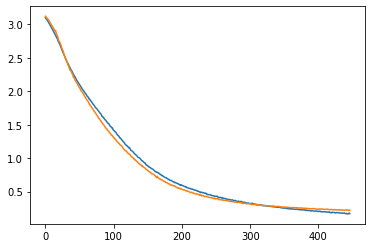

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

In [ ]:
model.save('/content/drive/MyDrive/model_saves/model_lewis',save_format='h5')